In [28]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


from google.colab import files
uploaded = files.upload()
import io
netflix = pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))
netflix

Saving netflix_titles.csv to netflix_titles (3).csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [29]:
uploaded_2 = files.upload()
import io
plus_data = pd.read_csv(io.BytesIO(uploaded_2['plus_data.csv']))
plus_data


Saving plus_data.csv to plus_data (4).csv


,Zone,MadeInUSA
0,4,No
1,1,Yes
2,1,Yes
3,1,Yes
4,1,No
...,...,...
7782,4,No
7783,4,Yes
7784,1,Yes
7785,4,Yes


In [70]:
frames = [netflix, plus_data]
result = pd.concat(frames, axis=1, join="inner")

In [33]:
result.info()
result.head(15)
result.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
 12  Zone          7787 non-null   int64 
 13  MadeInUSA     7787 non-null   object
dtypes: int64(2), object(12)
memory usage: 851.8+ KB


,release_year,Zone
count,7787.000000,7787.000000
mean,2013.932580,2.525363
std,8.757395,1.134979
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,2.000000
75%,2018.000000,4.000000
max,2021.000000,4.000000


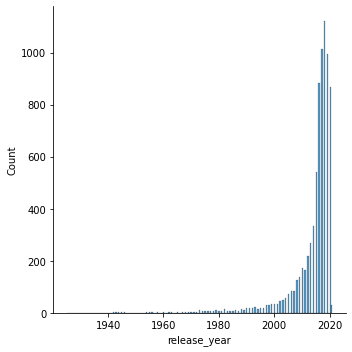

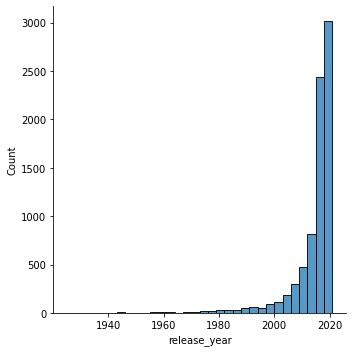

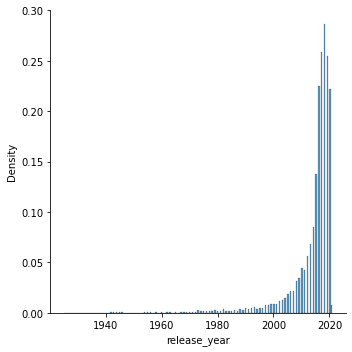

In [39]:
# Extraire la fonctionnalité qui nous intéresse
data = result['release_year']
# Generer histogram/distribution plot
# count
sns.displot(data)
sns.displot(data, binwidth = 3)
# Generer histogram/distribution plot
# density
sns.displot(data, stat="density")

plt.show()
# On voit quand Netflix était le plus actif avec de nouveaux ajouts:

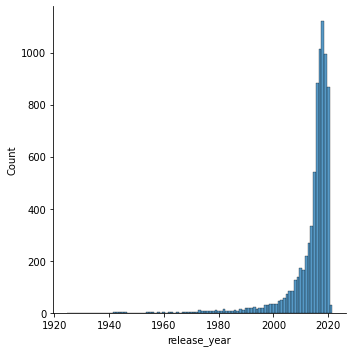

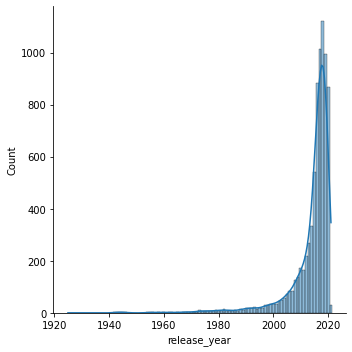

In [41]:
sns.displot(data, discrete=True)
#  tracer un complot KDE simplement en définissant le kde argument à True:
sns.displot(data, discrete=True, kde= True)

In [57]:
result['country'].value_counts()

United States                          1653
India                                   832
United Kingdom                          174
Canada                                  104
Egypt                                    87
                                       ... 
United Kingdom, Jordan, Qatar, Iran       1
Austria, United States                    1
South Korea, Czech Republic               1
United States, Nicaragua                  1
Switzerland                               1
Name: country, Length: 544, dtype: int64

In [58]:
result['country'].describe()

count              4808
unique              544
top       United States
freq               1653
Name: country, dtype: object

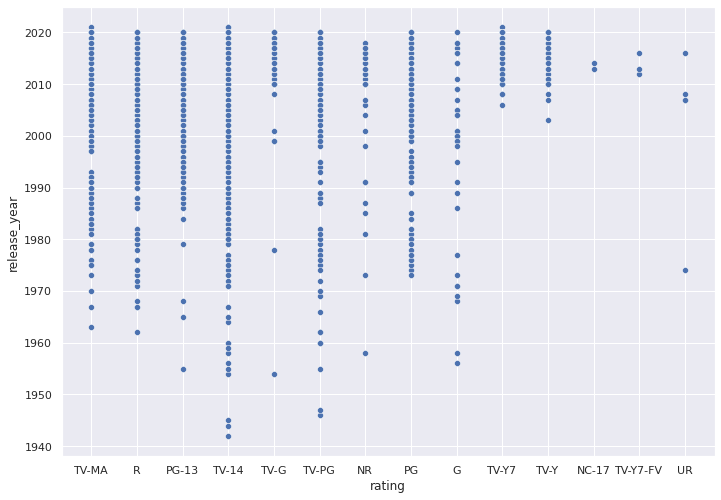

In [85]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data=result ,x="rating",y="release_year", ax=ax)

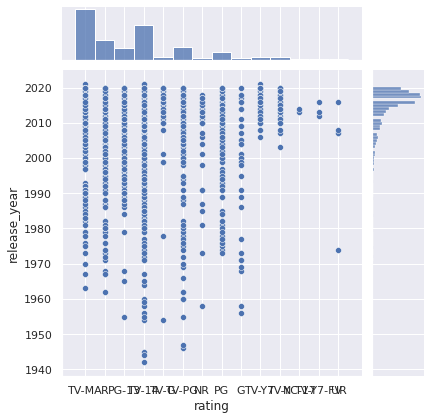

In [84]:
#supprimé les valeurs nulles car Seaborn aura du mal à les convertir en valeurs utilisables.
result.dropna(inplace=True)
#   diagramme histogramme pour le évaluation , ainsi qu’un graphique d’histogramme pour la année de sortie fonctionnalité:

sns.jointplot(x = "rating", y = "release_year", data = result)
# https://en.wikipedia.org/wiki/TV_Parental_Guidelines
# La plupart des entrées ajoutées sont TV-MA. 
# il y a aussi beaucoup de TV-14 entrées.

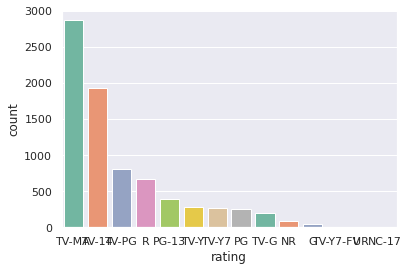

In [73]:
sns.countplot(x = 'rating', data = result, palette = 'Set2', order = result['rating'].value_counts().index[0:15])

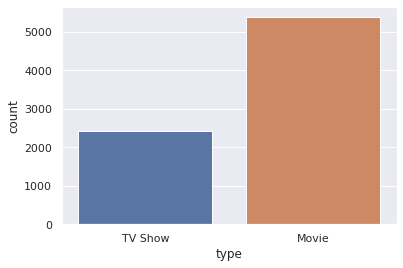

In [72]:
sns.countplot(x="type",data=result)
plt.show()

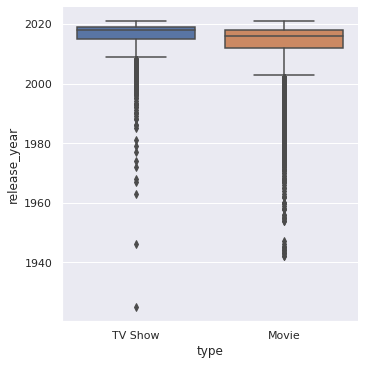

In [74]:
filter_tab = sns.catplot(data=result, x='type', y='release_year', kind='box')

In [122]:
# result.dropna(inplace=True)
titles_for_tv_g = result[(result['rating'] == 'TV-G') ]

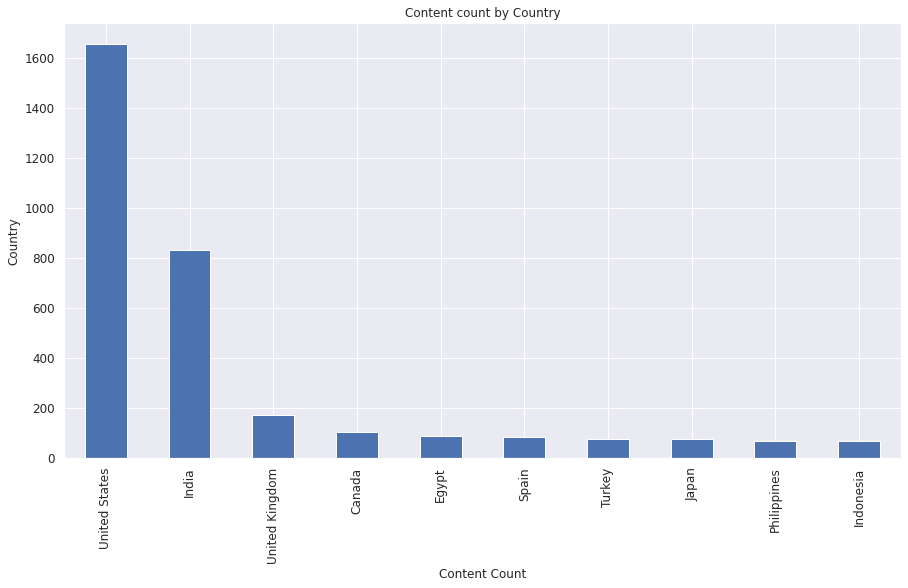

In [123]:
group_country_movies=result.groupby('country')['show_id'].count().sort_values(ascending=False).head(10);
plt.subplots(figsize=(15,8));
group_country_movies.plot(kind='bar',fontsize=12);
plt.xlabel('Content Count',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Content count by Country',fontsize=12)
plt.ioff()

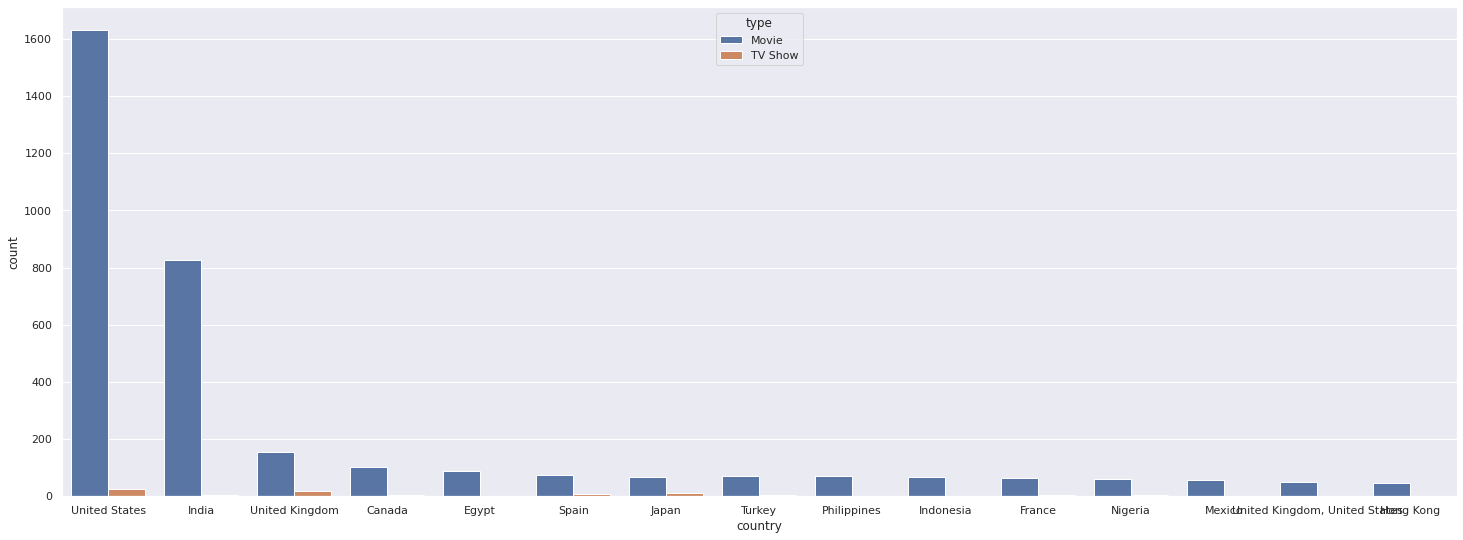

In [125]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="country",data=result, hue= "type",order = result['country'].value_counts().index[0:15])

In [80]:
type_tab = result[(result['type']== 'Movie') & (result['release_year'] <= 1999 )]
type_tab

type_tab['release_year'].describe()

count     402.000000
mean     1985.000000
std        13.084227
min      1942.000000
25%      1979.000000
50%      1989.000000
75%      1995.000000
max      1999.000000
Name: release_year, dtype: float64

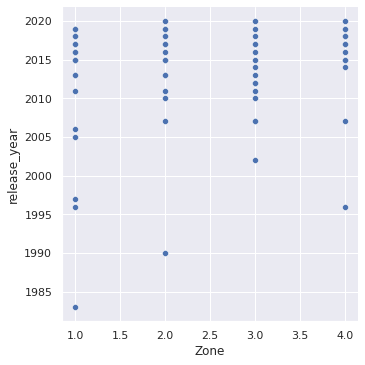

In [100]:
# Return a random sample of items from an axis of object.
new_result = result.sample(80)
sns.relplot(x=new_result["Zone"],y=new_result["release_year"],data=new_result)

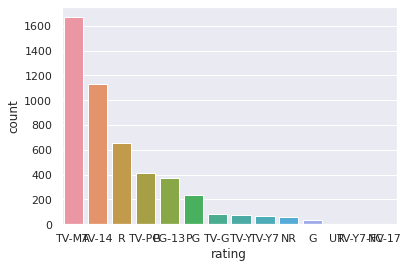

In [103]:
sns.countplot(x="rating",data=result,order= result['rating'].value_counts().index[0:14])

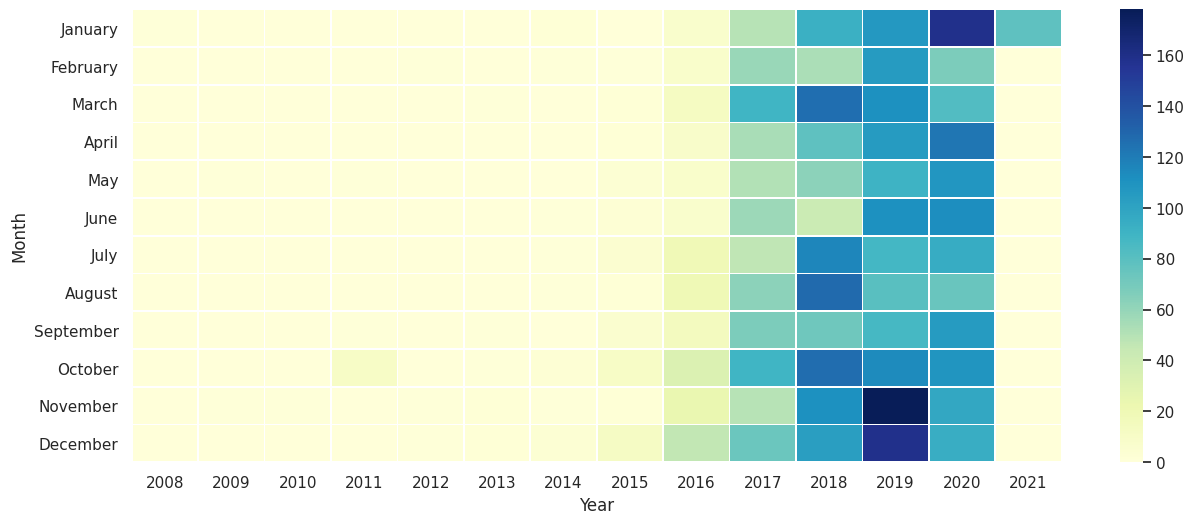

In [116]:
# carte thermique pour analyser le contenu du mois le moins diffusé
net_date = result[['date_added']].dropna()
# récupération des valeurs du mois et de l'année à partir du result pour tracer la carte thermique
net_date['Year'] = net_date.date_added.apply(lambda y : y.split(' ')[-1])
net_date['Month'] = net_date.date_added.apply(lambda y : y.split(' ')[0])


# mois est disponible dans la colonne 'dateadded' (format 'mois date, année')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df = net_date.groupby('Year')['Month'].value_counts().unstack().fillna(0)[month_order].T

ax = plt.subplots(figsize = (15, 6), dpi=100)
# cmap matplotlib colormap name or object, or list of colors, optional
# linecolorcolor, optional
ax = sns.heatmap(df, cmap="YlGnBu", linewidths=.5)
# ax = sns.heatmap(df, annot=True, linewidths=.5, fmt='.2g')


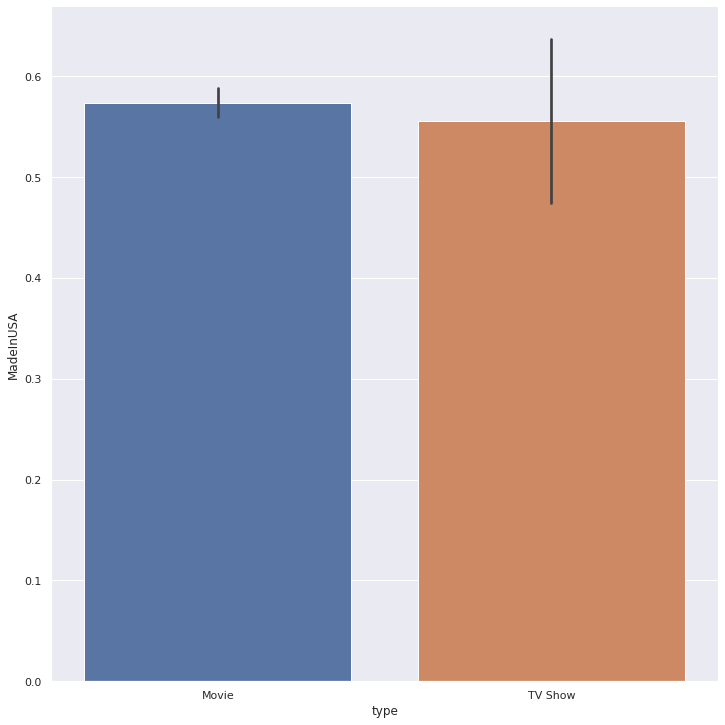

In [127]:
result_boolean = result.replace('Yes', 1).replace('No',0)
sns.catplot(data=result_boolean, x='type', y='MadeInUSA', kind='bar', height=10)

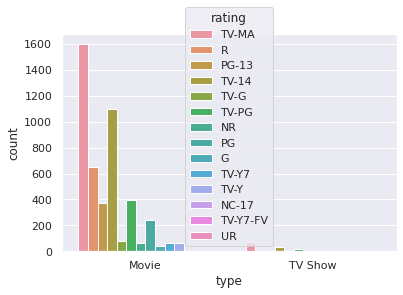

In [129]:
sns.countplot(x='type', hue='rating', data=result)